In [1]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("US_Accidents_Cleaned.csv")


C:\Users\polep\AppData\Local\Temp\ipykernel_4292\1002797861.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Accidents_Cleaned.csv")


In [2]:
# Check the first few rows
print(df[['Start_Time', 'End_Time']].head())
print(df[['Start_Time', 'End_Time']].dtypes)

            Start_Time             End_Time
0  2016-02-08 05:46:00  2016-02-08 11:00:00
1  2016-02-08 06:07:59  2016-02-08 06:37:59
2  2016-02-08 06:49:27  2016-02-08 07:19:27
3  2016-02-08 07:23:34  2016-02-08 07:53:34
4  2016-02-08 07:39:07  2016-02-08 08:09:07
Start_Time    object
End_Time      object
dtype: object


In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])


In [6]:
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek   # Monday=0, Sunday=6
df['Day_Name'] = df['Start_Time'].dt.day_name()


In [7]:
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60  # in minutes


In [8]:
# Convert to a single timezone if required
df['Start_Time'] = df['Start_Time'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')


<Axes: title={'center': 'Accidents by Hour of Day'}>

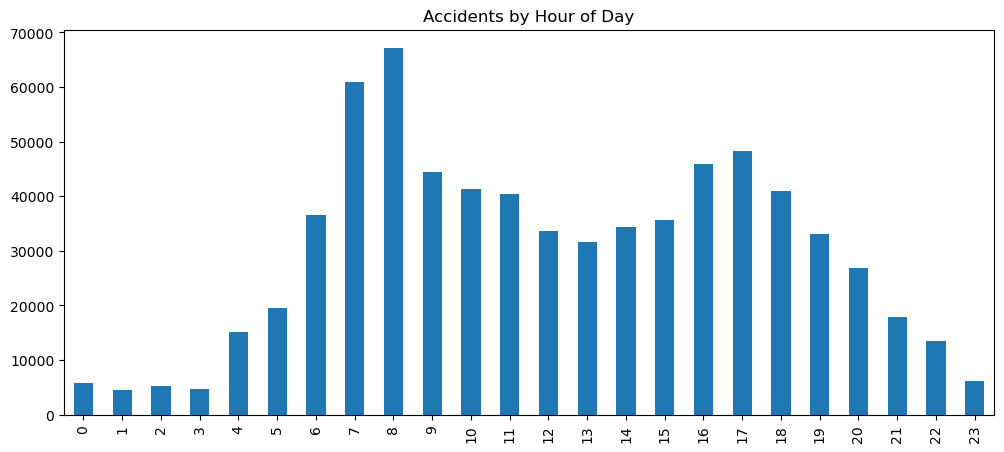

In [9]:
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(12,5), title="Accidents by Hour of Day")


<Axes: title={'center': 'Accidents by Day of Week'}>

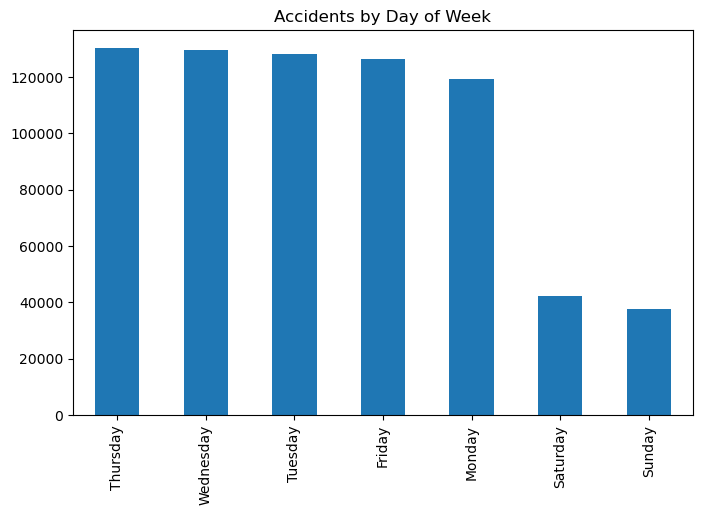

In [10]:
df['Day_Name'].value_counts().plot(kind='bar', figsize=(8,5), title="Accidents by Day of Week")


In [ ]:
A Sample dataset to handle date and time

In [11]:
import pandas as pd
import numpy as np

# Create synthetic dataset with string datetime values
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=10, freq='D').astype(str)  # 10 days
random_dates = np.random.choice(dates, size=15)  # 15 records with some repeats

# Create DataFrame with string datetime column and a feature
df = pd.DataFrame({
    'accident_id': range(1, 16),
    'date_str': random_dates,
    'severity': np.random.randint(1, 5, size=15)  # severity levels 1 to 4
})

# Show initial dataset
print("Initial dataset with date column as string:")
print(df.head())

Initial dataset with date column as string:
   accident_id    date_str  severity
0            1  2023-01-07         1
1            2  2023-01-04         2
2            3  2023-01-08         4
3            4  2023-01-05         4
4            5  2023-01-07         2


In [12]:
# Convert string column to datetime type
df['date'] = pd.to_datetime(df['date_str'])

# Extract datetime features
df['hour'] = df['date'].dt.hour         # hour of day (0 since no time in data)
df['weekday'] = df['date'].dt.day_name()  # day of week name
df['month'] = df['date'].dt.month_name()  # month name

print("\nDataset with extracted datetime features:")
print(df.head())


Dataset with extracted datetime features:
   accident_id    date_str  severity       date  hour    weekday    month
0            1  2023-01-07         1 2023-01-07     0   Saturday  January
1            2  2023-01-04         2 2023-01-04     0  Wednesday  January
2            3  2023-01-08         4 2023-01-08     0     Sunday  January
3            4  2023-01-05         4 2023-01-05     0   Thursday  January
4            5  2023-01-07         2 2023-01-07     0   Saturday  January


In [13]:
# Handling missing datetime values: introduce NaT (missing) for demonstration
nan_indices = np.random.choice(df.index, size=2, replace=False)
df.loc[nan_indices, 'date'] = pd.NaT

print("\nDataset with missing datetime values (NaT):")
print(df.loc[nan_indices])

# Fill missing datetime values using forward fill method
df['date_filled'] = df['date'].fillna(method='ffill')

print("\nDataset after filling missing datetime values (forward fill):")
print(df.loc[nan_indices])



Dataset with missing datetime values (NaT):
   accident_id    date_str  severity date  hour    weekday    month
1            2  2023-01-04         2  NaT     0  Wednesday  January
5            6  2023-01-10         2  NaT     0    Tuesday  January

Dataset after filling missing datetime values (forward fill):
   accident_id    date_str  severity date  hour    weekday    month  \
1            2  2023-01-04         2  NaT     0  Wednesday  January   
5            6  2023-01-10         2  NaT     0    Tuesday  January   

  date_filled  
1  2023-01-07  
5  2023-01-07  


In [14]:
# Additional datetime handling examples:

# Drop rows with missing datetime values
df_dropped = df.dropna(subset=['date'])

# Filter rows where date is after a specific datetime
filtered_df = df[df['date'] > pd.Timestamp('2023-01-05')]

print("\nRows after dropping missing datetime:")
print(df_dropped.head())

print("\nRows with date after 2023-01-05:")
print(filtered_df.head())


Rows after dropping missing datetime:
   accident_id    date_str  severity       date  hour   weekday    month  \
0            1  2023-01-07         1 2023-01-07     0  Saturday  January   
2            3  2023-01-08         4 2023-01-08     0    Sunday  January   
3            4  2023-01-05         4 2023-01-05     0  Thursday  January   
4            5  2023-01-07         2 2023-01-07     0  Saturday  January   
6            7  2023-01-03         2 2023-01-03     0   Tuesday  January   

  date_filled  
0  2023-01-07  
2  2023-01-08  
3  2023-01-05  
4  2023-01-07  
6  2023-01-03  

Rows with date after 2023-01-05:
   accident_id    date_str  severity       date  hour   weekday    month  \
0            1  2023-01-07         1 2023-01-07     0  Saturday  January   
2            3  2023-01-08         4 2023-01-08     0    Sunday  January   
4            5  2023-01-07         2 2023-01-07     0  Saturday  January   
7            8  2023-01-07         4 2023-01-07     0  Saturday  Janua